In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers
from keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2025-12-04 21:20:58.277973: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764883258.472048      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764883258.529150      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [5]:
# Read Arabic training data
X_train_arabic = pd.read_csv("/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv")
print("Arabic Train dataset:")
display(X_train_arabic.head())

# Read Arabic test data
X_test_arabic = pd.read_csv("/kaggle/input/ahcd1/csvTestImages 3360x1024.csv")
print("Arabic Test dataset:")
display(X_test_arabic.head())

# Read labels
Y_train_arabic = pd.read_csv("/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv")
Y_test_arabic  = pd.read_csv("/kaggle/input/ahcd1/csvTestLabel 3360x1.csv")
display(Y_train_arabic.head()) # the key of the map
# Check the shapes of the datasets
print("Shapes:")
print("X_train_arabic:", X_train_arabic.shape)
print("X_test_arabic:", X_test_arabic.shape)
print("Y_train_arabic:", Y_train_arabic.shape)
print("Y_test_arabic:", Y_test_arabic.shape)

Arabic Train dataset:


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Arabic Test dataset:


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.919,0.920,0.921,0.922,0.923,0.924,0.925,0.926,0.927,0.928
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,1
0,1
1,1
2,1
3,1
4,1


Shapes:
X_train_arabic: (13439, 1024)
X_test_arabic: (3359, 1024)
Y_train_arabic: (13439, 1)
Y_test_arabic: (3359, 1)


In [6]:
import struct

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# Paths
train_images_path = "/kaggle/input/emnist/emnist_source_files/emnist-letters-train-images-idx3-ubyte"
train_labels_path = "/kaggle/input/emnist/emnist_source_files/emnist-letters-train-labels-idx1-ubyte"
test_images_path  = "/kaggle/input/emnist/emnist_source_files/emnist-letters-test-images-idx3-ubyte"
test_labels_path  = "/kaggle/input/emnist/emnist_source_files/emnist-letters-test-labels-idx1-ubyte"

# Read images
x_train_english = read_idx(train_images_path)
x_test_english  = read_idx(test_images_path)

# Read labels
y_train_english = read_idx(train_labels_path)
y_test_english  = read_idx(test_labels_path)

print("x_train_english:", x_train_english.shape)
print("y_train_english:", y_train_english.shape)

x_train_english: (124800, 28, 28)
y_train_english: (124800,)


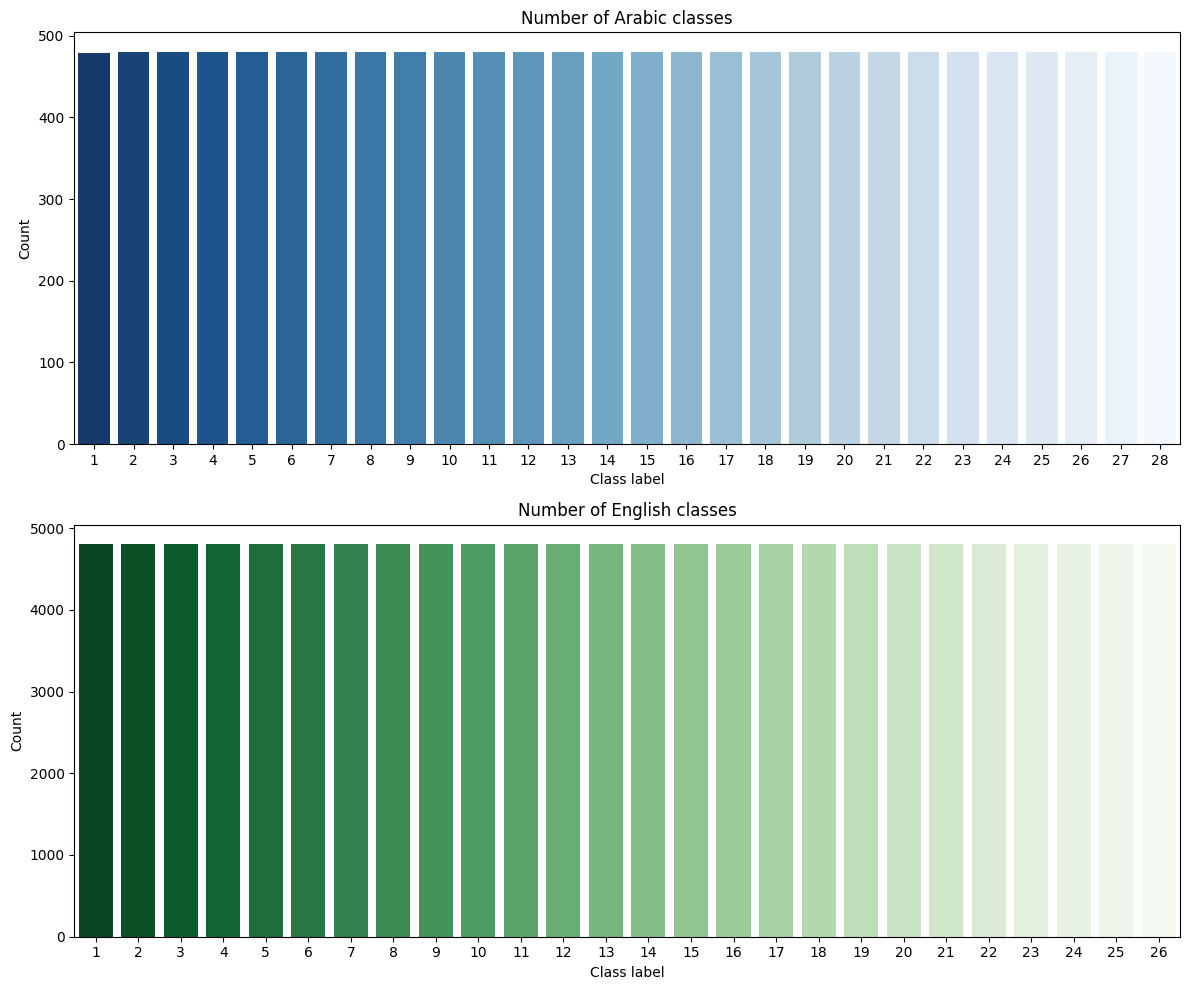

In [7]:
# Visualize the number of classes for both datasets
# labels
y_labels_arabic = Y_train_arabic.iloc[:, 0]  # extract the first column
y_labels_english = y_train_english

fig, axes = plt.subplots(2, 1, figsize=(12,10)) 

# Arabic classes
sns.countplot(x=y_labels_arabic, palette="Blues_r", ax=axes[0])
axes[0].set_title("Number of Arabic classes")
axes[0].set_xlabel("Class label")
axes[0].set_ylabel("Count")

# English classes
sns.countplot(x=y_labels_english, palette="Greens_r", ax=axes[1])
axes[1].set_title("Number of English classes")
axes[1].set_xlabel("Class label")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [8]:
# Arabic data preprocessing

# Convert DataFrame → NumPy array
X_train_arabic = X_train_arabic.values
X_test_arabic  = X_test_arabic.values

# Reshape
X_train_arabic = X_train_arabic.reshape(-1, 32, 32, 1)
X_test_arabic  = X_test_arabic.reshape(-1, 32, 32, 1)

# Resize to 28x28
X_train_arabic = tf.image.resize(X_train_arabic, (28,28)).numpy()
X_test_arabic  = tf.image.resize(X_test_arabic, (28,28)).numpy()

# Labels → NumPy
Y_train_arabic = Y_train_arabic.to_numpy().flatten()
Y_test_arabic  = Y_test_arabic.to_numpy().flatten()

# Normalize
X_train_arabic = X_train_arabic / 255.0
X_test_arabic  = X_test_arabic / 255.0

print("Arabic data shapes:")
print("X_train_arabic:", X_train_arabic.shape)
print("X_test_arabic:", X_test_arabic.shape)
print("Y_train_arabic:", Y_train_arabic.shape)
print("Y_test_arabic:", Y_test_arabic.shape)

Arabic data shapes:
X_train_arabic: (13439, 28, 28, 1)
X_test_arabic: (3359, 28, 28, 1)
Y_train_arabic: (13439,)
Y_test_arabic: (3359,)


2025-12-04 21:27:40.393154: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
# English data preprocessing

# Reshape 
x_train_english = x_train_english.reshape(-1, 28, 28, 1)
x_test_english  = x_test_english.reshape(-1, 28, 28, 1)

# Normalize 
x_train_english = x_train_english / 255.0
x_test_english  = x_test_english / 255.0

# Convert labels to NumPy arrays
y_train_english = np.array(y_train_english)
y_test_english  = np.array(y_test_english)

# Check shapes
print("x_train_english shape:", x_train_english.shape)
print("x_test_english shape:", x_test_english.shape)
print("y_train_english shape:", y_train_english.shape)
print("y_test_english shape:", y_test_english.shape)

x_train_english shape: (124800, 28, 28, 1)
x_test_english shape: (20800, 28, 28, 1)
y_train_english shape: (124800,)
y_test_english shape: (20800,)


In [11]:
from keras.utils import to_categorical
import numpy as np

# --- Arabic labels ---
Y_train_arabic = Y_train_arabic - 1  # shift to start from 0
Y_test_arabic  = Y_test_arabic  - 1
num_arabic_classes = 28
num_english_classes = 26
total_classes = num_arabic_classes + num_english_classes

# One-hot for Arabic
Y_train_arabic_onehot = to_categorical(Y_train_arabic, num_classes=num_arabic_classes)
Y_test_arabic_onehot  = to_categorical(Y_test_arabic,  num_classes=num_arabic_classes)

# Extend Arabic one-hot to total_classes
Y_train_arabic_onehot_full = np.zeros((Y_train_arabic_onehot.shape[0], total_classes))
Y_train_arabic_onehot_full[:, :num_arabic_classes] = Y_train_arabic_onehot

Y_test_arabic_onehot_full = np.zeros((Y_test_arabic_onehot.shape[0], total_classes))
Y_test_arabic_onehot_full[:, :num_arabic_classes] = Y_test_arabic_onehot

# --- English labels ---
# Shift English labels to start from Arabic classes
Y_train_english_shifted = y_train_english + num_arabic_classes
Y_test_english_shifted  = y_test_english  + num_arabic_classes

# Make sure no value exceeds total_classes-1
Y_train_english_shifted = np.clip(Y_train_english_shifted, 0, total_classes-1)
Y_test_english_shifted  = np.clip(Y_test_english_shifted, 0, total_classes-1)

# One-hot for English
Y_train_english_onehot_full = to_categorical(Y_train_english_shifted, num_classes=total_classes)
Y_test_english_onehot_full  = to_categorical(Y_test_english_shifted,  num_classes=total_classes)

# --- Combine Arabic + English ---
X_train = np.concatenate([X_train_arabic, x_train_english], axis=0)
Y_train = np.concatenate([Y_train_arabic_onehot_full, Y_train_english_onehot_full], axis=0)

X_test= np.concatenate([X_test_arabic, x_test_english], axis=0)
Y_test = np.concatenate([Y_test_arabic_onehot_full, Y_test_english_onehot_full], axis=0)

print("X_train:", X_train.shape)
print("Y_trainl:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

X_train: (138239, 28, 28, 1)
Y_trainl: (138239, 54)
X_test: (24159, 28, 28, 1)
Y_test: (24159, 54)


In [28]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_test.shape)

x_train shape (110591, 28, 28, 1)
x_test shape (27648, 28, 28, 1)
y_train shape (110591, 54)
y_test shape (27648, 54)
